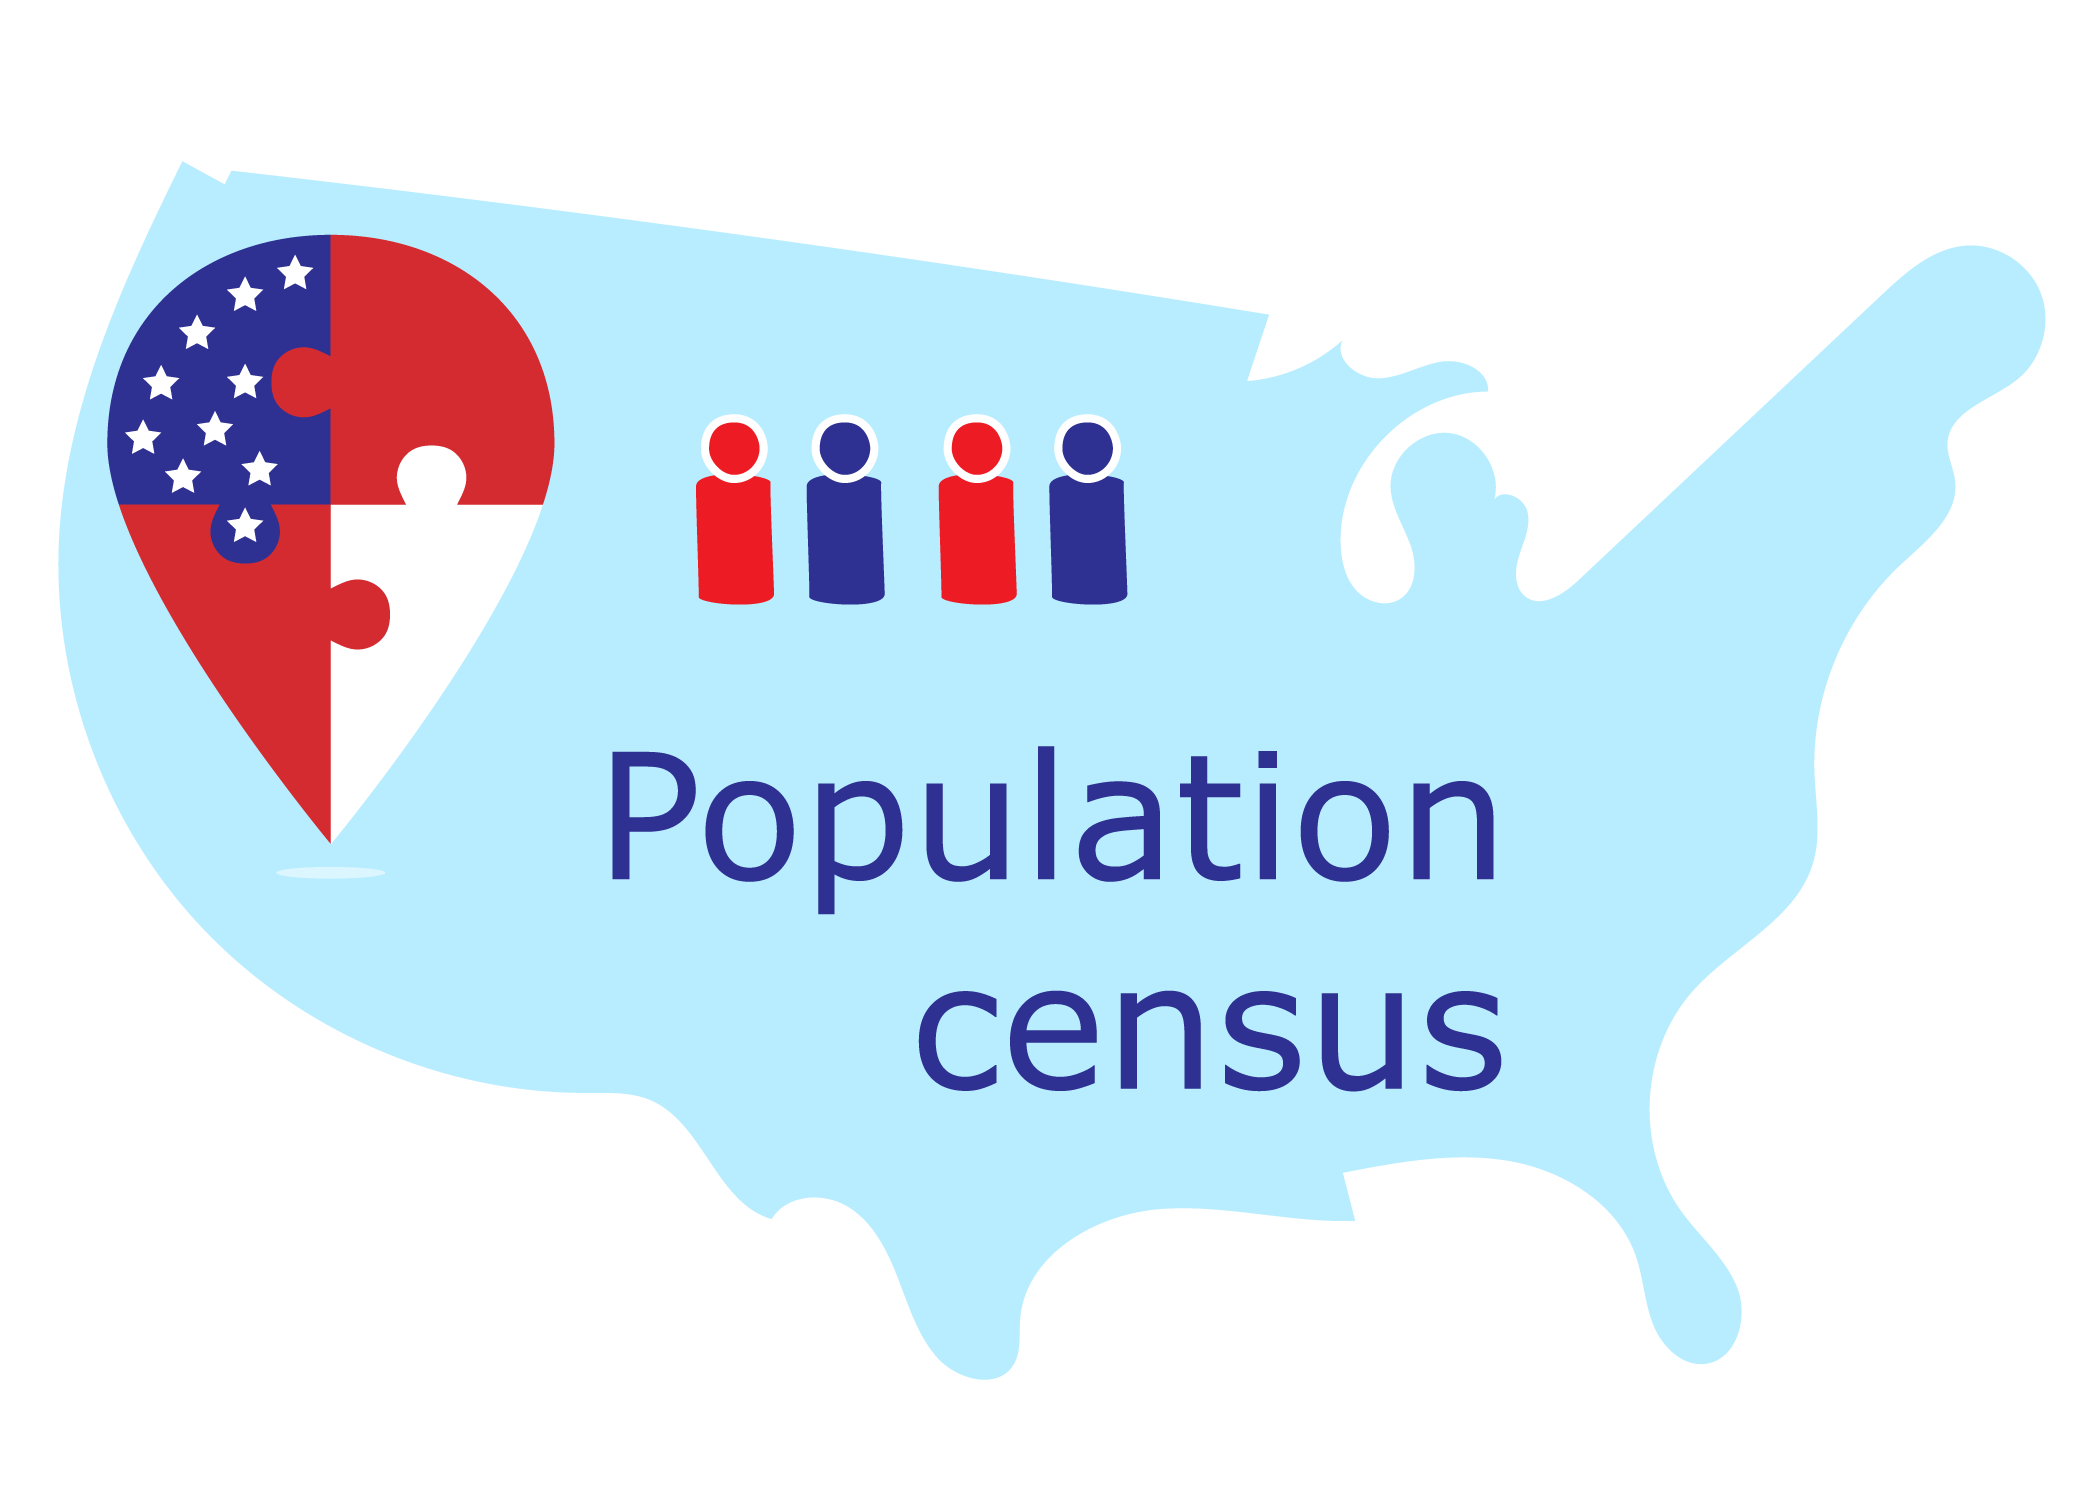

<div class="alert alert-block alert-info">
<b>Census Data Analysis:</b> in this project i will be:
</div>

#### Let's start the task of the census analysis by importing necessary *Python* libraries

In [81]:
import pandas as pd
import numpy as np
import csv
import matplotlib 

![Blue line.png](<attachment:Blue line.png>)

<div class="alert alert-block alert-info">
<b>- Data Importing</b> 
</div>

In [82]:
census = pd.read_csv("census_data.csv")
print(census)

    first_name   last_name birth_year  voted  num_children  income_year  \
0       Denise       Ratke       2005  False             0     92129.41   
1         Hali   Cummerata       1987  False             0     75649.17   
2      Salomon         Orn       1992   True             2    166313.45   
3       Sarina    Schiller       1965  False             2     71704.81   
4         Gust   Abernathy       1945  False             2    143316.08   
..         ...         ...        ...    ...           ...          ...   
95      Carisa       Hills       1958  False             3    157117.14   
96      Tameka     Collins       2001  False             1     61518.34   
97       Adams    Leuschke       1987  False             0     41784.87   
98  Earnestine     Gutmann       1985   True             4     79021.46   
99        Rosa  Runolfsson       1961   True             3     82300.02   

           higher_tax marital_status  
0            disagree         single  
1             neutral

![Blue line.png](<attachment:Blue line.png>)

<div class="alert alert-block alert-info">
<b>- Data Exploration</b> 
</div>

- Data types and memory usage

In [83]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   first_name      100 non-null    object 
 1   last_name       100 non-null    object 
 2   birth_year      100 non-null    object 
 3   voted           100 non-null    bool   
 4   num_children    100 non-null    int64  
 5   income_year     100 non-null    float64
 6   higher_tax      100 non-null    object 
 7   marital_status  100 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 5.7+ KB


- Columns and rows

In [84]:
census.shape

(100, 8)

* Summary Statistics 

In [85]:
census.describe()

,num_children,income_year
count,100.000000,100.000000
mean,1.810000,111380.789700
std,1.433333,49015.171775
min,0.000000,35635.140000
25%,0.750000,71246.520000
50%,2.000000,104990.805000
75%,3.000000,153492.090000
max,4.000000,198123.770000


In [86]:
census.head()

,first_name,last_name,birth_year,voted,num_children,income_year,higher_tax,marital_status
0,Denise,Ratke,2005,False,0,92129.41,disagree,single
1,Hali,Cummerata,1987,False,0,75649.17,neutral,divorced
2,Salomon,Orn,1992,True,2,166313.45,agree,single
3,Sarina,Schiller,1965,False,2,71704.81,strongly agree,married
4,Gust,Abernathy,1945,False,2,143316.08,agree,married


In [87]:
census.dtypes

first_name         object
last_name          object
birth_year         object
voted                bool
num_children        int64
income_year       float64
higher_tax         object
marital_status     object
dtype: object

- lets find the avg birth of year

In [88]:
census["birth_year"].unique()

array(['2005', '1987', '1992', '1965', '1945', '1951', '1963', '1949',
       '1950', '1971', '2007', '1944', '1995', '1973', '1946', '1954',
       '1994', '1989', '1947', '1993', '1976', '1984', 'missing', '1966',
       '1941', '2000', '1953', '1956', '1960', '2001', '1980', '1955',
       '1985', '1996', '1968', '1979', '2006', '1962', '1981', '1959',
       '1977', '1978', '1983', '1957', '1961', '1982', '2002', '1998',
       '1999', '1952', '1940', '1986', '1958'], dtype=object)

- let's replace the missing value

In [89]:
census['birth_year'] = census['birth_year'].replace(['missing'], 1967)


In [90]:
census["birth_year"].unique()

array(['2005', '1987', '1992', '1965', '1945', '1951', '1963', '1949',
       '1950', '1971', '2007', '1944', '1995', '1973', '1946', '1954',
       '1994', '1989', '1947', '1993', '1976', '1984', 1967, '1966',
       '1941', '2000', '1953', '1956', '1960', '2001', '1980', '1955',
       '1985', '1996', '1968', '1979', '2006', '1962', '1981', '1959',
       '1977', '1978', '1983', '1957', '1961', '1982', '2002', '1998',
       '1999', '1952', '1940', '1986', '1958'], dtype=object)

- let's change the data values so we can perform calculation on it

In [91]:
census["birth_year"] = census.birth_year.astype("int")

In [92]:
census.dtypes

first_name         object
last_name          object
birth_year          int32
voted                bool
num_children        int64
income_year       float64
higher_tax         object
marital_status     object
dtype: object

In [93]:
census.birth_year.mean()

1973.4

In [94]:
census.describe()

,birth_year,num_children,income_year
count,100.000000,100.000000,100.000000
mean,1973.400000,1.810000,111380.789700
std,20.102264,1.433333,49015.171775
min,1940.000000,0.000000,35635.140000
25%,1955.000000,0.750000,71246.520000
50%,1972.000000,2.000000,104990.805000
75%,1992.000000,3.000000,153492.090000
max,2007.000000,4.000000,198123.770000


let's use Categorical method to rank our higher_tax

In [95]:
print(census["higher_tax"].unique())

['disagree' 'neutral' 'agree' 'strongly agree' 'strongly disagree']


In [96]:
census.higher_tax = pd.Categorical(census.higher_tax, ["strongly disagree", "disagree", "neutral", "agree", "strongly agree"], ordered=True)
print(census["higher_tax"].unique())

['disagree', 'neutral', 'agree', 'strongly agree', 'strongly disagree']
Categories (5, object): ['strongly disagree' < 'disagree' < 'neutral' < 'agree' < 'strongly agree']


- let's calculate the median of the number of children 

census['higher_tax'] = census['higher_tax'].cat.codes


In [97]:
census["higher_tax"].median()
census.higher_tax.dtypes


TypeError: 'Categorical' with dtype category does not support reduction 'median'

In [ ]:
census.head()

,first_name,last_name,birth_year,voted,num_children,income_year,higher_tax,marital_status
0,Denise,Ratke,2005,False,0,92129.41,1,single
1,Hali,Cummerata,1987,False,0,75649.17,2,divorced
2,Salomon,Orn,1992,True,2,166313.45,3,single
3,Sarina,Schiller,1965,False,2,71704.81,4,married
4,Gust,Abernathy,1945,False,2,143316.08,3,married


<div class="alert alert-block alert-info">
<b>- now higher tax is converted to numercial variable int that was object before</b> 
</div>

let' one hot encode the martial status to make the data usable for machine learning

In [ ]:
census = pd.get_dummies(data=census, columns=["marital_status"])

census.head()

,first_name,last_name,birth_year,voted,num_children,income_year,higher_tax,marital_status_divorced,marital_status_married,marital_status_single,marital_status_widowed
0,Denise,Ratke,2005,False,0,92129.41,1,False,False,True,False
1,Hali,Cummerata,1987,False,0,75649.17,2,True,False,False,False
2,Salomon,Orn,1992,True,2,166313.45,3,False,False,True,False
3,Sarina,Schiller,1965,False,2,71704.81,4,False,True,False,False
4,Gust,Abernathy,1945,False,2,143316.08,3,False,True,False,False


In [ ]:
census.dtypes

first_name                  object
last_name                   object
birth_year                   int32
voted                         bool
num_children                 int64
income_year                float64
higher_tax                    int8
marital_status_divorced       bool
marital_status_married        bool
marital_status_single         bool
marital_status_widowed        bool
dtype: object

- lets convert divorced status and count it

In [ ]:
census['marital_status_divorced'] = census['marital_status_divorced'].astype("category").cat.codes


In [ ]:
census.head()

,first_name,last_name,birth_year,voted,num_children,income_year,higher_tax,marital_status_divorced,marital_status_married,marital_status_single,marital_status_widowed
0,Denise,Ratke,2005,False,0,92129.41,1,0,False,True,False
1,Hali,Cummerata,1987,False,0,75649.17,2,1,False,False,False
2,Salomon,Orn,1992,True,2,166313.45,3,0,False,True,False
3,Sarina,Schiller,1965,False,2,71704.81,4,0,True,False,False
4,Gust,Abernathy,1945,False,2,143316.08,3,0,True,False,False


In [ ]:
divorced_people = census[census["marital_status_divorced"] == 1]
print(divorced_people.marital_status_divorced.count())

22


In [ ]:
census.head(100)

,first_name,last_name,birth_year,voted,num_children,income_year,higher_tax,marital_status_divorced,marital_status_married,marital_status_single,marital_status_widowed
0,Denise,Ratke,2005,False,0,92129.41,1,0,False,True,False
1,Hali,Cummerata,1987,False,0,75649.17,2,1,False,False,False
2,Salomon,Orn,1992,True,2,166313.45,3,0,False,True,False
3,Sarina,Schiller,1965,False,2,71704.81,4,0,True,False,False
4,Gust,Abernathy,1945,False,2,143316.08,3,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
95,Carisa,Hills,1958,False,3,157117.14,3,0,True,False,False
96,Tameka,Collins,2001,False,1,61518.34,0,0,False,True,False
97,Adams,Leuschke,1987,False,0,41784.87,4,0,False,True,False
98,Earnestine,Gutmann,1985,True,4,79021.46,1,0,False,False,True


In [ ]:
census.describe()

,birth_year,num_children,income_year,higher_tax,marital_status_divorced
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1973.400000,1.810000,111380.789700,2.000000,0.220000
std,20.102264,1.433333,49015.171775,1.318095,0.416333
min,1940.000000,0.000000,35635.140000,0.000000,0.000000
25%,1955.000000,0.750000,71246.520000,1.000000,0.000000
50%,1972.000000,2.000000,104990.805000,2.000000,0.000000
75%,1992.000000,3.000000,153492.090000,3.000000,0.000000
max,2007.000000,4.000000,198123.770000,4.000000,1.000000
